<a href="https://colab.research.google.com/github/pachterlab/GRNP_2020/blob/master/notebooks/figure_generation/GenFigS1-S3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Generates supplementary figures 1-3**

This notebook generates histograms of fraction of single-copy molecules (per gene) for different datasets.

Steps:
1. Download the code and processed data
2. Setup the R environment
3. Generate the figures

The data for these figures is produced by the following notebooks:

Processing of FASTQ files with kallisto and bustools:

https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/FASTQ_processing/ProcessEVAL.ipynb
https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/FASTQ_processing/ProcessEVALPBMC.ipynb
https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/FASTQ_processing/ProcessEVALPBMC_DS.ipynb
https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/FASTQ_processing/ProcessEVALPBMC_SW.ipynb
https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/FASTQ_processing/ProcessLC.ipynb
https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/FASTQ_processing/ProcessMRET.ipynb
https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/FASTQ_processing/ProcessMRET2.ipynb
https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/FASTQ_processing/ProcessPBMC_NG.ipynb
https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/FASTQ_processing/ProcessPBMC_NG_2.ipynb
https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/FASTQ_processing/ProcessPBMC_V2.ipynb
https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/FASTQ_processing/ProcessPBMC_V3.ipynb
https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/FASTQ_processing/ProcessPBMC_V3_2.ipynb
https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/FASTQ_processing/ProcessPBMC_V3_3.ipynb
https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/FASTQ_processing/ProcessMARSSEQ.ipynb

Preprocessing of BUG files:

https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/R_processing/ProcessR_EVAL.ipynb
https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/R_processing/ProcessR_EVALPBMC.ipynb
https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/R_processing/ProcessR_EVALPBMC_DS.ipynb
https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/R_processing/ProcessR_EVALPBMC_SW.ipynb
https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/R_processing/ProcessR_LC.ipynb
https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/R_processing/ProcessR_MRET.ipynb
https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/R_processing/ProcessR_MRET2.ipynb
https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/R_processing/ProcessR_PBMC_NG.ipynb
https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/R_processing/ProcessR_PBMC_NG_2.ipynb
https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/R_processing/ProcessR_PBMC_V2.ipynb
https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/R_processing/ProcessR_PBMC_V3.ipynb
https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/R_processing/ProcessR_PBMC_V3_2.ipynb
https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/R_processing/ProcessR_PBMC_V3_3.ipynb
https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/R_processing/ProcessR_MARSSEQ.ipynb


**1. Download the code and processed data**

In [1]:
#download the R code
![ -d "GRNP_2020" ] && rm -r GRNP_2020

!git clone https://github.com/pachterlab/GRNP_2020.git


Cloning into 'GRNP_2020'...
remote: Enumerating objects: 289, done.
remote: Counting objects: 100% (289/289), done.
remote: Compressing objects: 100% (232/232), done.
remote: Total 2007 (delta 210), reused 83 (delta 57), pack-reused 1718
Receiving objects: 100% (2007/2007), 10.86 MiB | 23.40 MiB/s, done.
Resolving deltas: 100% (1395/1395), done.


In [2]:
#download processed data from Zenodo
#download processed data from Zenodo for all datasets
![ -d "figureData" ] && rm -r figureData
!mkdir figureData
!cd figureData && wget https://zenodo.org/record/4661263/files/EVAL.zip?download=1 && unzip 'EVAL.zip?download=1' && rm 'EVAL.zip?download=1'
!cd figureData && wget https://zenodo.org/record/4661263/files/EVALPBMC.zip?download=1 && unzip 'EVALPBMC.zip?download=1' && rm 'EVALPBMC.zip?download=1'
!cd figureData && wget https://zenodo.org/record/4661263/files/EVALPBMC_DS.zip?download=1 && unzip 'EVALPBMC_DS.zip?download=1' && rm 'EVALPBMC_DS.zip?download=1'
!cd figureData && wget https://zenodo.org/record/4661263/files/EVALPBMC_SW.zip?download=1 && unzip 'EVALPBMC_SW.zip?download=1' && rm 'EVALPBMC_SW.zip?download=1'
!cd figureData && wget https://zenodo.org/record/4661263/files/PBMC_V3_3.zip?download=1 && unzip 'PBMC_V3_3.zip?download=1' && rm 'PBMC_V3_3.zip?download=1'
!cd figureData && wget https://zenodo.org/record/4661263/files/PBMC_V3_2.zip?download=1 && unzip 'PBMC_V3_2.zip?download=1' && rm 'PBMC_V3_2.zip?download=1'
!cd figureData && wget https://zenodo.org/record/4661263/files/PBMC_V3.zip?download=1 && unzip 'PBMC_V3.zip?download=1' && rm 'PBMC_V3.zip?download=1'
!cd figureData && wget https://zenodo.org/record/4661263/files/PBMC_NG.zip?download=1 && unzip 'PBMC_NG.zip?download=1' && rm 'PBMC_NG.zip?download=1'
!cd figureData && wget https://zenodo.org/record/4661263/files/PBMC_NG_2.zip?download=1 && unzip 'PBMC_NG_2.zip?download=1' && rm 'PBMC_NG_2.zip?download=1'
!cd figureData && wget https://zenodo.org/record/4661263/files/PBMC_V2.zip?download=1 && unzip 'PBMC_V2.zip?download=1' && rm 'PBMC_V2.zip?download=1'
!cd figureData && wget https://zenodo.org/record/4661263/files/LC.zip?download=1 && unzip 'LC.zip?download=1' && rm 'LC.zip?download=1'
!cd figureData && wget https://zenodo.org/record/4661263/files/MRET.zip?download=1 && unzip 'MRET.zip?download=1' && rm 'MRET.zip?download=1'
!cd figureData && wget https://zenodo.org/record/4661263/files/MRET2.zip?download=1 && unzip 'MRET2.zip?download=1' && rm 'MRET2.zip?download=1'
!cd figureData && wget https://zenodo.org/record/4661263/files/MARSSEQ.zip?download=1 && unzip 'MARSSEQ.zip?download=1' && rm 'MARSSEQ.zip?download=1'

--2021-04-04 17:33:19--  https://zenodo.org/record/4661263/files/EVAL.zip?download=1
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 206479312 (197M) [application/octet-stream]
Saving to: ‘EVAL.zip?download=1’

EVAL.zip?download=1 100%[===================>] 196.91M  10.2MB/s    in 16s     

2021-04-04 17:33:36 (12.2 MB/s) - ‘EVAL.zip?download=1’ saved [206479312/206479312]

Archive:  EVAL.zip?download=1
   creating: EVAL/
  inflating: EVAL/Bug_10.RData       
  inflating: EVAL/Bug_100.RData      
  inflating: EVAL/Bug_20.RData       
  inflating: EVAL/Bug_25.RData       
  inflating: EVAL/Bug_40.RData       
  inflating: EVAL/Bug_5.RData        
  inflating: EVAL/Bug_60.RData       
  inflating: EVAL/Bug_80.RData       
  inflating: EVAL/ds_summary.txt     
  inflating: EVAL/PredEvalData.RDS   
  inflating: EVAL/Stats.RData        
--2021-04-04 17:33:39--  ht

In [3]:
#Check that download worked
!cd figureData && ls -l && cd EVAL && ls -l

total 56
drwxr-xr-x 2 root root 4096 Jul  1  2020 EVAL
drwxr-xr-x 2 root root 4096 Jul  1  2020 EVALPBMC
drwxr-xr-x 2 root root 4096 Jul  1  2020 EVALPBMC_DS
drwxr-xr-x 2 root root 4096 Jul  1  2020 EVALPBMC_SW
drwxr-xr-x 2 root root 4096 Jul  1  2020 LC
drwxr-xr-x 2 root root 4096 Feb  4 19:07 MARSSEQ
drwxr-xr-x 2 root root 4096 Jul  1  2020 MRET
drwxr-xr-x 2 root root 4096 Jul  1  2020 MRET2
drwxr-xr-x 2 root root 4096 Jul  1  2020 PBMC_NG
drwxr-xr-x 2 root root 4096 Jul  1  2020 PBMC_NG_2
drwxr-xr-x 2 root root 4096 Jul  1  2020 PBMC_V2
drwxr-xr-x 2 root root 4096 Jul  1  2020 PBMC_V3
drwxr-xr-x 2 root root 4096 Jul  1  2020 PBMC_V3_2
drwxr-xr-x 2 root root 4096 Jul  1  2020 PBMC_V3_3
total 212788
-rw-r--r-- 1 root root 37523336 Jun 30  2020 Bug_100.RData
-rw-r--r-- 1 root root 17301493 Jun 30  2020 Bug_10.RData
-rw-r--r-- 1 root root 23443334 Jun 30  2020 Bug_20.RData
-rw-r--r-- 1 root root 25288320 Jun 30  2020 Bug_25.RData
-rw-r--r-- 1 root root 29057075 Jun 30  2020 Bug_40.RData

**2. Prepare the R environment**

In [4]:
#switch to R mode
%reload_ext rpy2.ipython


In [5]:
#install the R packages and setup paths
%%R
install.packages("dplyr")
install.packages("ggplot2")
install.packages("ggpubr")



R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/dplyr_1.0.5.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 949019 bytes (926 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write 

**3. Generate the figures**


In [6]:
#First set some path variables
%%R
source("GRNP_2020/RCode/pathsGoogleColab.R")


In [7]:
#Import helpers (available in other notebooks)
%%R
source(paste0(sourcePath,"ButterflyHelpers.R"))



R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [8]:
#create figure directory
![ -d "figures" ] && rm -r figures
!mkdir figures

In [9]:
#####################################################
#Load the data and create a function for generating histogram plots
#####################################################
%%R
library(ggplot2)
library(ggpubr)

loadStats("LC")
loadStats("PBMC_NG")
loadStats("PBMC_NG_2")
loadStats("PBMC_V3")
loadStats("PBMC_V3_2")
loadStats("PBMC_V3_3")
loadStats("PBMC_V2")
loadStats("EVAL")
loadStats("EVALPBMC")
loadStats("EVALPBMC_DS")
loadStats("EVALPBMC_SW")
loadStats("MRET")
loadStats("MRET2")
loadStats("MARSSEQ")

#function for generating histogram plot
FSCMHistPlot = function(umis, fracones, title) {
  filt = fracones[umis >= 30]
  h = hist(filt, breaks=seq(0, 1, by=0.05), plot=F)
  df = data.frame(x = h$mids, y = h$density*0.05) #convert density to fraction of the total molecules
  fig = ggplot(df,aes(x=x,y=y)) +
    geom_bar(stat="identity", orientation = "x") + #orientation x is a workaround for a bug in ggplot
    labs(y="Frac. of mol.", x="FSCM", title=title) +
    theme(panel.background = element_rect("white", "white", 0, 0, "white")) +
    theme(axis.title = element_text(size = 10))
  v = var(filt)
  return(list(f=fig, v= v))
}



[1] "Mean variance, 10X: 0.0332607321656123"
[1] "Std dev of variance, 10X: 0.0117192091752715"


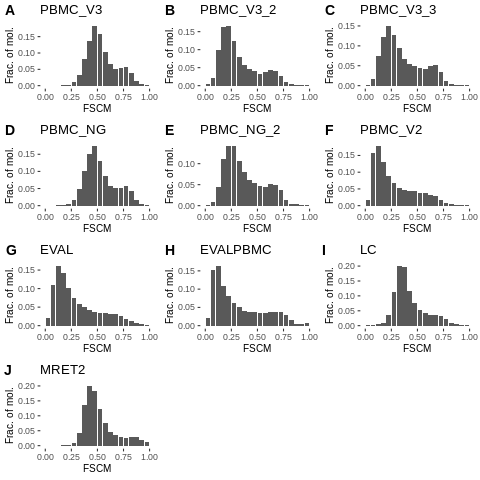

In [10]:
#####################################################
# Fig S1 (10X datasets)
#####################################################
%%R
figS1_1 = FSCMHistPlot(statsPBMC_V3$UMIs_PBMC_V3_d_100, statsPBMC_V3$FracOnes_PBMC_V3_d_100, "PBMC_V3")
figS1_2 = FSCMHistPlot(statsPBMC_V3_2$UMIs_PBMC_V3_2_d_100, statsPBMC_V3_2$FracOnes_PBMC_V3_2_d_100, "PBMC_V3_2")
figS1_3 = FSCMHistPlot(statsPBMC_V3_3$UMIs_PBMC_V3_3_d_100, statsPBMC_V3_3$FracOnes_PBMC_V3_3_d_100, "PBMC_V3_3")
figS1_4 = FSCMHistPlot(statsPBMC_NG$UMIs_PBMC_NG_d_100, statsPBMC_NG$FracOnes_PBMC_NG_d_100, "PBMC_NG")
figS1_5 = FSCMHistPlot(statsPBMC_NG_2$UMIs_PBMC_NG_2_d_100, statsPBMC_NG_2$FracOnes_PBMC_NG_2_d_100, "PBMC_NG_2")
figS1_6 = FSCMHistPlot(statsPBMC_V2$UMIs_PBMC_V2_d_100, statsPBMC_V2$FracOnes_PBMC_V2_d_100, "PBMC_V2")
figS1_7 = FSCMHistPlot(statsEVAL$UMIs_EVAL_d_100, statsEVAL$FracOnes_EVAL_d_100, "EVAL")
figS1_8 = FSCMHistPlot(statsEVALPBMC$UMIs_EVALPBMC_d_100, statsEVALPBMC$FracOnes_EVALPBMC_d_100, "EVALPBMC")
figS1_9 = FSCMHistPlot(statsLC$UMIs_LC_d_100, statsLC$FracOnes_LC_d_100, "LC")
figS1_10 = FSCMHistPlot(statsMRET2$UMIs_MRET2_d_100, statsMRET2$FracOnes_MRET2_d_100, "MRET2")

figS1 = ggarrange(figS1_1$f, figS1_2$f, figS1_3$f, figS1_4$f, figS1_5$f, figS1_6$f, figS1_7$f,
                       figS1_8$f, figS1_9$f, figS1_10$f, nrow=4, ncol=3,
                       labels=c("A","B","C","D","E","F","G","H","I","J"))
print(figS1)
ggsave(
  paste0(figure_path, "FigS1.png"),
  plot = figS1, device = "png",
  width = 6, height = 7, dpi = 300)

tenxvariances = c(figS1_1$v,figS1_2$v,figS1_3$v,figS1_4$v,figS1_5$v,figS1_6$v,figS1_7$v,figS1_8$v,figS1_9$v,figS1_10$v)

print(paste0("Mean variance, 10X: ", mean(tenxvariances)))#0.03326073
print(paste0("Std dev of variance, 10X: ", sd(tenxvariances)))#0.01171921


[1] "Mean variance, Drop-Seq: 0.0179059120369525"
[1] "Std dev of variance, Drop-Seq: 0.00165403623240107"


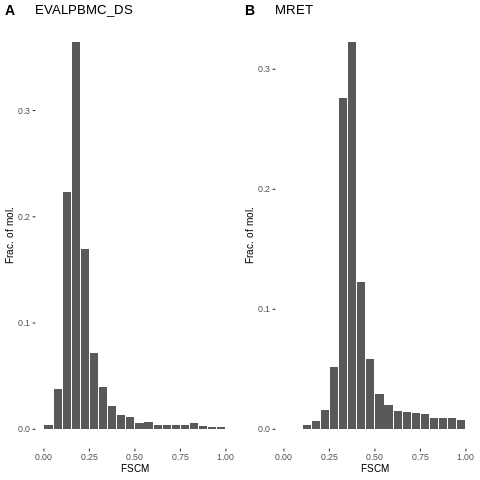

In [11]:
###########################
# Fig S2 (Drop-Seq datasets)
###########################
%%R

figS2_1 = FSCMHistPlot(statsEVALPBMC_DS$UMIs_EVALPBMC_DS_d_100, statsEVALPBMC_DS$FracOnes_EVALPBMC_DS_d_100, "EVALPBMC_DS")
figS2_2 = FSCMHistPlot(statsMRET$UMIs_MRET_d_100, statsMRET$FracOnes_MRET_d_100, "MRET")

figS2 = ggarrange(figS2_1$f, figS2_2$f, nrow=1, ncol=2,
                  labels=c("A","B"))
print(figS2)
ggsave(
  paste0(figure_path, "FigS2.png"),
  plot = figS2, device = "png",
  width = 4, height = 2, dpi = 300)

dsvariances = c(figS2_1$v,figS2_2$v)
print(paste0("Mean variance, Drop-Seq: ", mean(dsvariances)))#0.01790591
print(paste0("Std dev of variance, Drop-Seq: ", sd(dsvariances)))#0.001654036


[1] "Mean variance, SeqWell: 0.0230407715540854"
[1] "Mean variance, MARS-Seq: 0.0165328745459394"


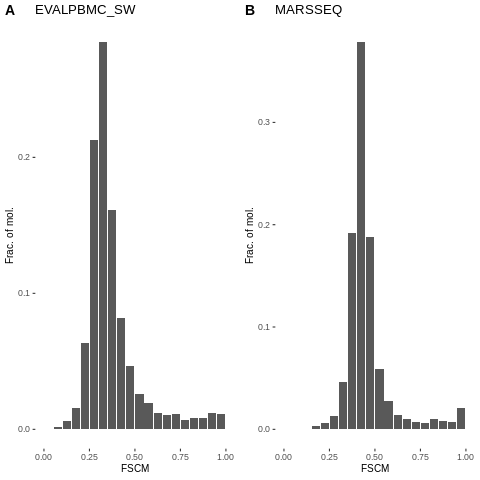

In [12]:
###########################
# Fig S3 (Seq-Well dataset)
###########################
%%R
figS3_1 = FSCMHistPlot(statsEVALPBMC_SW$UMIs_EVALPBMC_SW_d_100, statsEVALPBMC_SW$FracOnes_EVALPBMC_SW_d_100, "EVALPBMC_SW")
figS3_2 = FSCMHistPlot(statsMARSSEQ$UMIs_MARSSEQ_d_100, statsMARSSEQ$FracOnes_MARSSEQ_d_100, "MARSSEQ")

figS3 = ggarrange(figS3_1$f, figS3_2$f, nrow=1, ncol=2,
                  labels=c("A","B"))

print(figS3)
ggsave(
  paste0(figure_path, "FigS3.png"),
  plot = figS3, device = "png",
  width = 4, height = 2, dpi = 300)

swvariances = figS3_1$v
print(paste0("Mean variance, SeqWell: ", mean(swvariances)))#0.02304077
MARSSEQvariances = figS3_2$v
print(paste0("Mean variance, MARS-Seq: ", mean(MARSSEQvariances)))#0.01653287
